

# Preparing Data
```



In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
# %matplotlib inline
# importing necessary libraries

In [2]:
#!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
#!unzip -o AirQualityUCI.zip

In [3]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',',
                        usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data[:46]  # only use the first 46 samples
data = data.dropna(axis=0)
# data cleaned

hour = np.array([int(t[:2]) for t in data['Time']])
CO = np.array(data['CO(GT)'])

#seperating the data
T = CO.reshape(-1, 1)
Tnames = ['CO']
X = hour.reshape(-1, 1)
Xnames = ['Hour']
print('X.shape =', X.shape, 'Xnames =', Xnames)
print('T.shape =', T.shape, 'Tnames =', Tnames)

X.shape = (43, 1) Xnames = ['Hour']
T.shape = (43, 1) Tnames = ['CO']


Here, I have imported all the necessary libraries.
I have also downloaded, unzipped and the cleaned the data from the data file.

This is the basic look of what the data looks like.
I have plotted the hours on the X axis with CO on the Y axis.

Text(0, 0.5, 'CO')

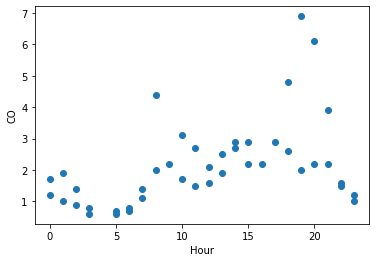

In [4]:
plt.plot(X, T, 'o')
plt.xlabel(Xnames[0])
plt.ylabel(Tnames[0])

# General Functions

This function returns the root mean square error of the data.

In [5]:
def rmse(model, X, T, W):
    Y = model(X, W)
    return np.sqrt(np.mean((T - Y)**2))

The ADAM function uses the gradient descent function to find out the ideal weights for which the RMSE would be the lowest.

In [6]:
def gradient_descent_adam(model_f, gradient_f, rmse_f, X, T, W, rho, n_steps):
    # Commonly used parameter values
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    
    for step in range(n_steps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W = W - rho * mhat / (np.sqrt(vhat) + epsilon)
        
    return np.array(W), np.array(error_sequence), np.array(W_sequence)

This function plots three graphs:


*   Error sequence v/s number of iterations
*   Change in weights v/s number of iterations
*   The actual data and how the fitted model compares to that data



In [7]:
def plotGraph(X, T, W, error_sequence, W_sequence, model_f):
  plt.figure(figsize=(20, 5))
  plt.subplot(1, 3, 1)
  plt.xlabel('Number of iterations')
  plt.ylabel('Error sequence')
  plt.plot(error_sequence)
  plt.subplot(1, 3, 2)
  plt.xlabel('Number of iterations')
  plt.ylabel('Weights')
  plt.plot(W_sequence)
  plt.subplot(1, 3, 3)
  plt.xlabel('Hours')
  plt.ylabel('CO')
  plt.plot(X, T, 'o')
  xs = np.linspace(0, 23, 3000).reshape(-1, 1)
  plt.plot(xs, model_f(xs, W));

# Linear Model

Linear model uses two weights to fit the data. 
The linear_model function returns the expected values based on intial weights.
The linear_model_gradient function returns the change in error with respect to the change in weights. I have plotted five graphs each with a different learning rate from 1.e-2 to 1.e-10.

In [8]:
#returns expected value for each X
def linear_model(X, W):
  return W[0, 0] + X * W[1, 0]

In [9]:
# this function returns the value of how the error changes with respect to the weights
def linear_model_gradient(X, T, W):
  Y = linear_model(X, W)
  dydw = np.insert(X, 0, 1, axis = 1)
  dedy = -2 * (T - Y)
  dedw = dedy.T @ dydw / X.shape[0]
  return dedw.T

In [10]:
W = np.array((0.2, 0.3)).reshape(2, 1)
W, error_sequence, W_sequence = gradient_descent_adam(linear_model, linear_model_gradient, rmse, X, T, W, 1.e-2, 3000)

[[1.11280169]
 [0.08854487]]
1.211108829378271


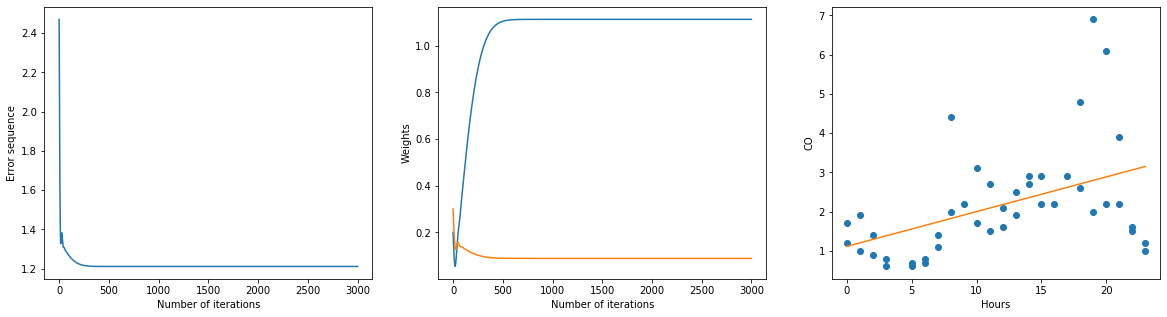

In [11]:
plotGraph(X, T, W, error_sequence, W_sequence, linear_model)
print(W)
print(error_sequence[-1])

In [12]:
W = np.array((0.2, 0.3)).reshape(2, 1)
W, error_sequence, W_sequence = gradient_descent_adam(linear_model, linear_model_gradient, rmse, X, T, W, 1.e-4, 3000)

[[0.13993434]
 [0.15292958]]
1.3118869542850844


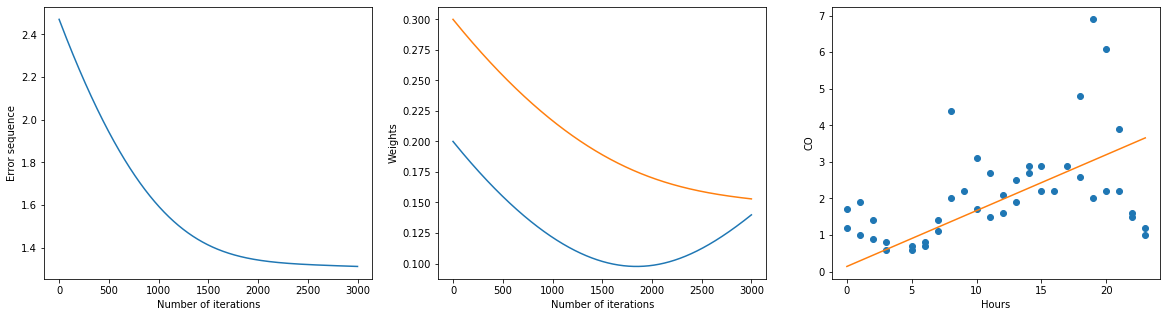

In [13]:
plotGraph(X, T, W, error_sequence, W_sequence, linear_model)
print(W)
print(error_sequence[-1])

In [14]:
W = np.array((0.2, 0.3)).reshape(2, 1)
W, error_sequence, W_sequence = gradient_descent_adam(linear_model, linear_model_gradient, rmse, X, T, W, 1.e-6, 3000)

[[0.19701257]
 [0.29701063]]
2.433735419231913


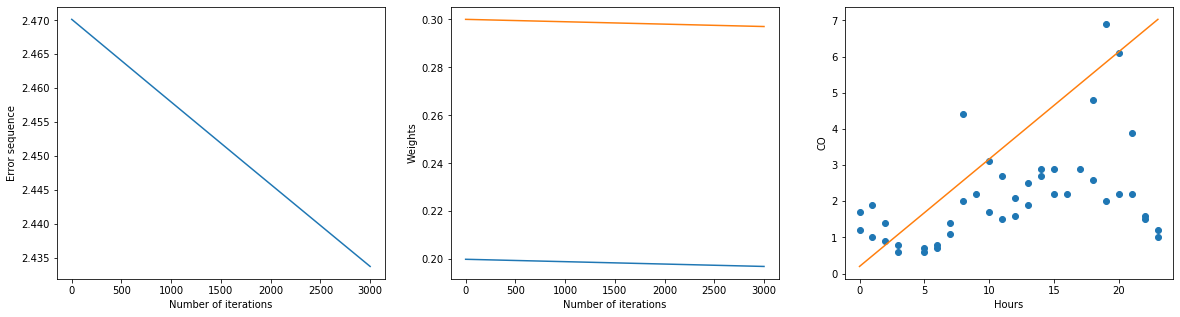

In [15]:
plotGraph(X, T, W, error_sequence, W_sequence, linear_model)
print(W)
print(error_sequence[-1])

In [16]:
W = np.array((0.2, 0.3)).reshape(2, 1)
W, error_sequence, W_sequence = gradient_descent_adam(linear_model, linear_model_gradient, rmse, X, T, W, 1.e-8, 3000)

[[0.19997]
 [0.29997]]
2.4697808247365804


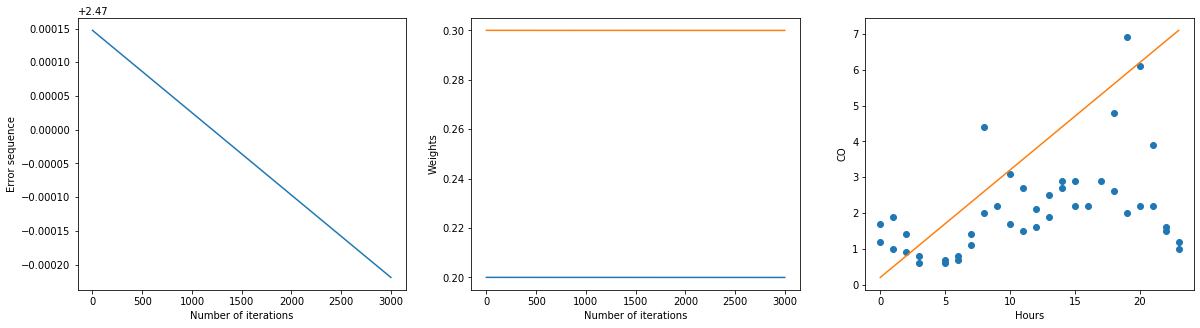

In [17]:
plotGraph(X, T, W, error_sequence, W_sequence, linear_model)
print(W)
print(error_sequence[-1])

In [18]:
W = np.array((0.2, 0.3)).reshape(2, 1)
W, error_sequence, W_sequence = gradient_descent_adam(linear_model, linear_model_gradient, rmse, X, T, W, 1.e-10, 3000)

[[0.1999997]
 [0.2999997]]
2.4701436797525784


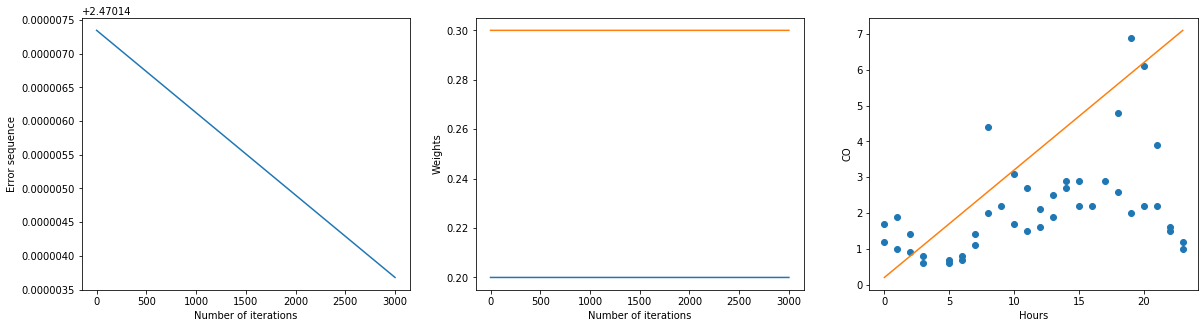

In [19]:
plotGraph(X, T, W, error_sequence, W_sequence, linear_model)
print(W)
print(error_sequence[-1])

The lowest error is encountered in the first graph when the learning rate in 1.e-2. The error goes down continuously with a sudden increase in between. The second graph is the next best weights. The error goes up by 1.259. The rest of the model perform very similar to each other.

# Quadratic Model

Quadratic model uses three weights to fit the data. 
The quadratic_model function returns the expected values based on intial weights.
The quadratic_model_gradient function returns the change in error with respect to the change in weights. I have plotted five graphs each with a different learning rate from 1.e-2 to 1.e-10.

In [20]:
# returns expected values for each X
def quadratic_model(X, W):
  return W[0, 0] + X * W[1, 0] + X * X * W[2, 0]

In [21]:
# this function returns the value of how the error changes with respect to the weights
def quadratic_model_gradient(X, T, W):
  Y = quadratic_model(X, W)
  linear_part = np.insert(X, 0, 1, axis=1)
  nonlinear_part = X**2
  dydw = np.hstack((linear_part, nonlinear_part))
  dedy = -2 * (T - Y)
  dedw = dedy.T @ dydw / X.shape[0]
  return dedw.T

In [22]:
W = np.array((0.3, 0.5, 0.7)).reshape(3, 1)
W, error_sequence, W_sequence = gradient_descent_adam(quadratic_model, quadratic_model_gradient, rmse, X, T, W, 1.e-2, 3000)

[[ 0.74976264]
 [ 0.1584401 ]
 [-0.00278083]]
1.1934334504387318


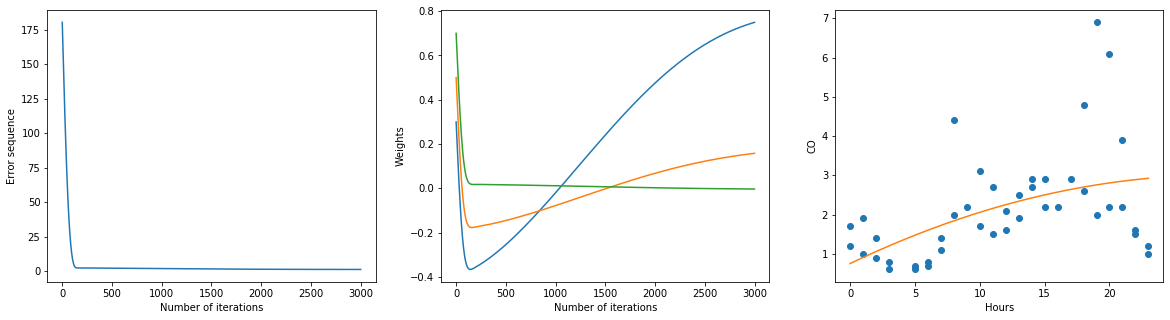

In [23]:
plotGraph(X, T, W, error_sequence, W_sequence, quadratic_model)
print(W)
print(error_sequence[-1])

In [24]:
W = np.array((0.3, 0.5, 0.7)).reshape(3, 1)
W, error_sequence, W_sequence = gradient_descent_adam(quadratic_model, quadratic_model_gradient, rmse, X, T, W, 1.e-4, 3000)

[[0.02622173]
 [0.22601249]
 [0.42592335]]
107.93962904252173


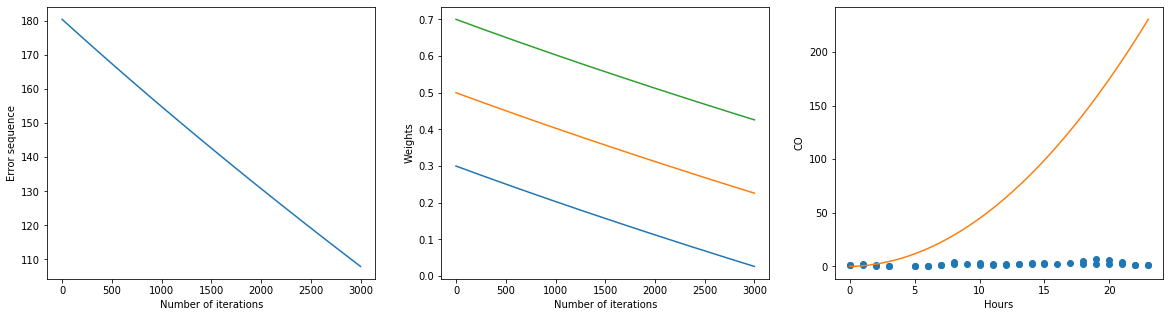

In [25]:
plotGraph(X, T, W, error_sequence, W_sequence, quadratic_model)
print(W)
print(error_sequence[-1])

In [26]:
W = np.array((0.3, 0.5, 0.7)).reshape(3, 1)
W, error_sequence, W_sequence = gradient_descent_adam(quadratic_model, quadratic_model_gradient, rmse, X, T, W, 1.e-6, 3000)

[[0.29700227]
 [0.49700225]
 [0.69700225]]
179.7028085728805


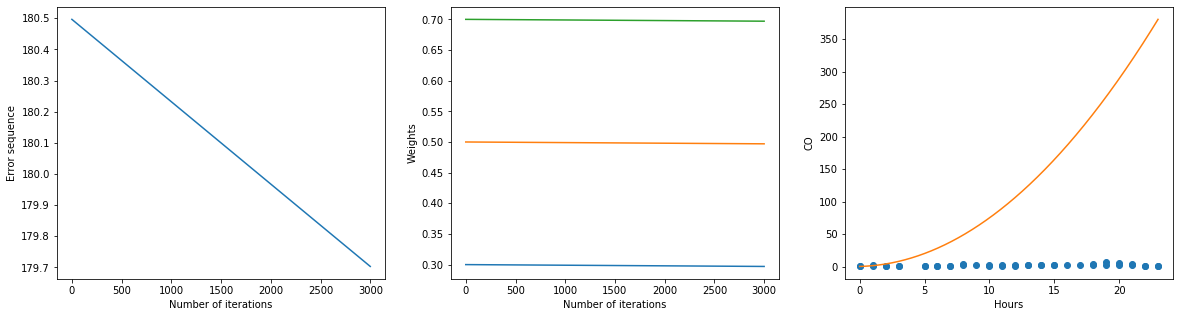

In [27]:
plotGraph(X, T, W, error_sequence, W_sequence, quadratic_model)
print(W)
print(error_sequence[-1])

In [28]:
W = np.array((0.3, 0.5, 0.7)).reshape(3, 1)
W, error_sequence, W_sequence = gradient_descent_adam(quadratic_model, quadratic_model_gradient, rmse, X, T, W, 1.e-8, 3000)

[[0.29997]
 [0.49997]
 [0.69997]]
180.48850361435467


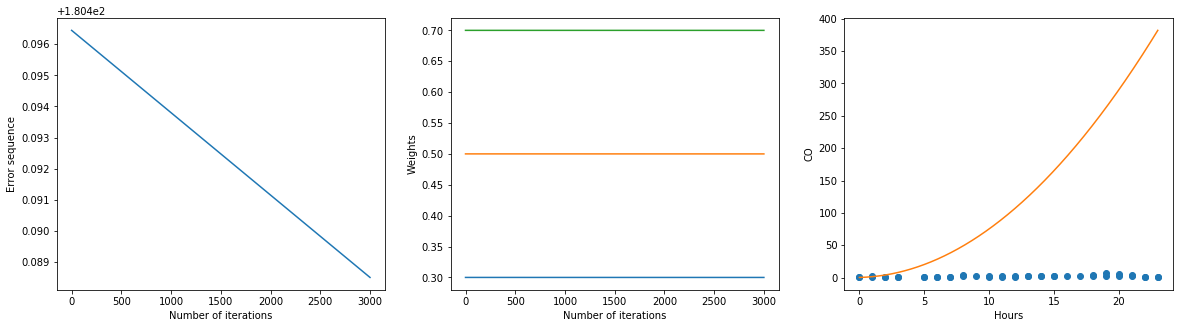

In [29]:
plotGraph(X, T, W, error_sequence, W_sequence, quadratic_model)
print(W)
print(error_sequence[-1])

In [30]:
W = np.array((0.3, 0.5, 0.7)).reshape(3, 1)
W, error_sequence, W_sequence = gradient_descent_adam(quadratic_model, quadratic_model_gradient, rmse, X, T, W, 1.e-10, 3000)

[[0.2999997]
 [0.4999997]
 [0.6999997]]
180.49636646067052


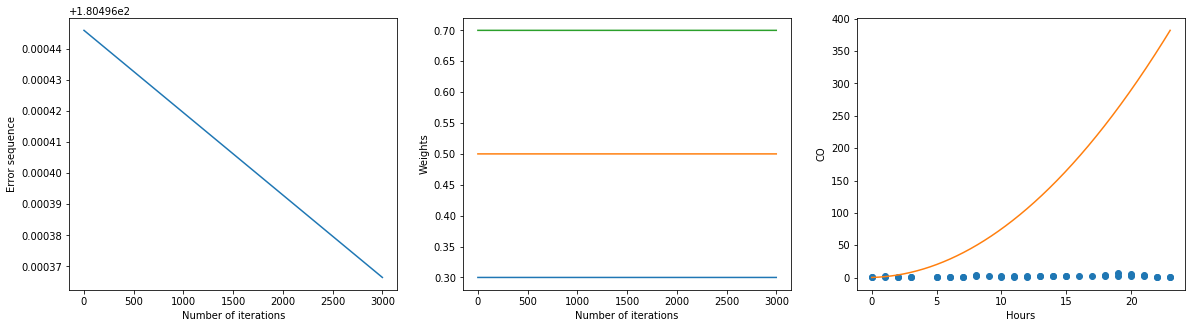

In [31]:
plotGraph(X, T, W, error_sequence, W_sequence, quadratic_model)
print(W)
print(error_sequence[-1])

The quadratic model performs significantly worse than it's linear counterpart. While the first one is still decent, all the models after that one perform horribly. There's almost a 100 times rise in the error rate when the learning rate is lowered to 1.e-4.

# Cubic Model

Cubic model uses four weights to fit the data. 
The cubic_model function returns the expected values based on intial weights.
The cubic_model_gradient function returns the change in error with respect to the change in weights. I have plotted five graphs each with a different learning rate from 1.e-2 to 1.e-10.

In [32]:
# returns expected values for each X
def cubic_model(X, W):
  return np.hstack((X, X**2, X**3)) @ W[1:, :] + W[0, :]

In [33]:
# this function returns the value of how the error changes with respect to the weights
def cubic_model_gradient(X, T, W):
    dEdY = -2 * (T - cubic_model(X, W))
    all_but_bias = np.hstack((X, X**2, X**3))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

In [34]:
W = np.array(np.linspace(0.2, 0.8, 4)).reshape(4, 1)
W, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W, 1.e-2, 3000)

[[ 0.01510912]
 [-0.11102671]
 [-0.0844197 ]
 [ 0.00478846]]
5.59020940126701


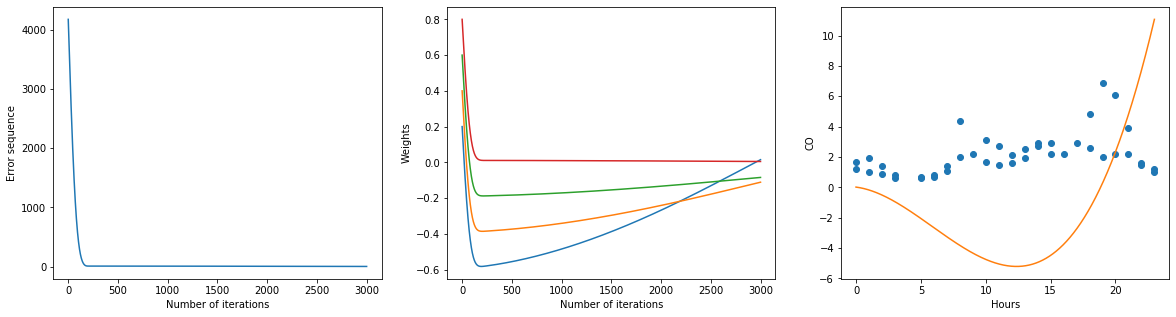

In [35]:
plotGraph(X, T, W, error_sequence, W_sequence, cubic_model)
print(W)
print(error_sequence[-1])

In [36]:
W, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W, 1.e-4, 3000)

[[ 0.15847522]
 [ 0.00730858]
 [ 0.03198543]
 [-0.00126878]]
1.1488930992928474


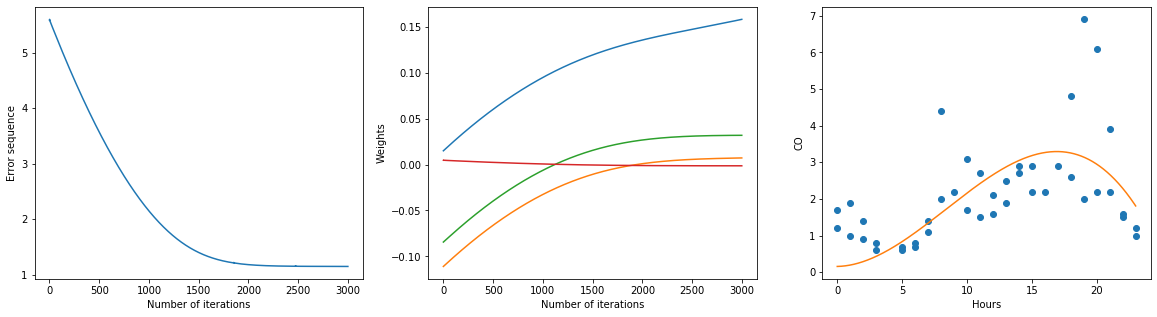

In [37]:
plotGraph(X, T, W, error_sequence, W_sequence, cubic_model)
print(W)
print(error_sequence[-1])

In [38]:
W, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W, 1.e-6, 3000)

[[ 0.16146492]
 [ 0.01020963]
 [ 0.03166861]
 [-0.00126059]]
1.1482633641304099


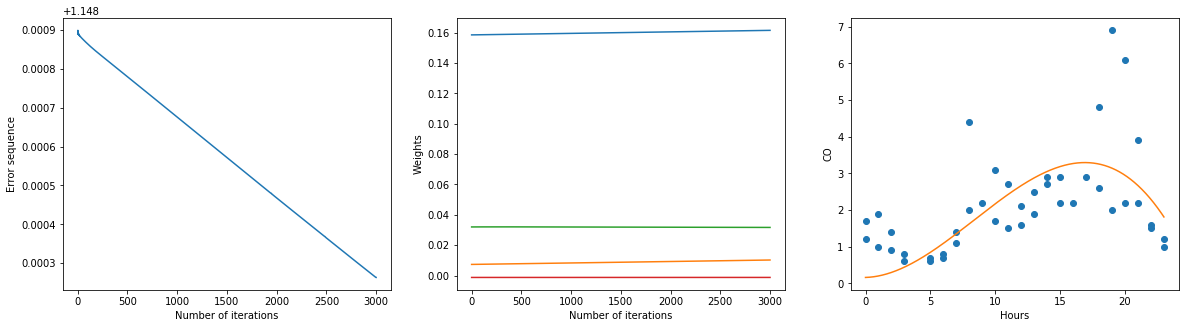

In [39]:
plotGraph(X, T, W, error_sequence, W_sequence, cubic_model)
print(W)
print(error_sequence[-1])

In [40]:
W, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W, 1.e-8, 3000)

[[ 0.16149492]
 [ 0.01023972]
 [ 0.03166185]
 [-0.00126054]]
1.1482562337871507


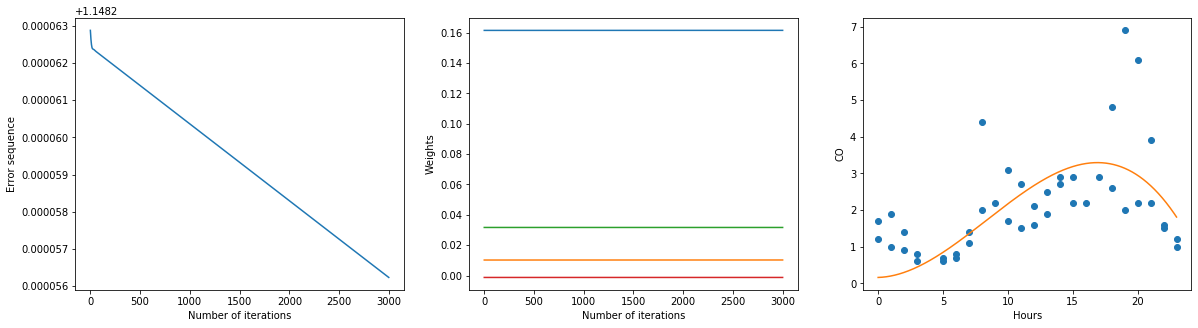

In [41]:
plotGraph(X, T, W, error_sequence, W_sequence, cubic_model)
print(W)
print(error_sequence[-1])

In [42]:
W, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W, 1.e-10, 3000)

[[ 0.16149522]
 [ 0.01024002]
 [ 0.03166157]
 [-0.00126053]]
1.1482561697424263


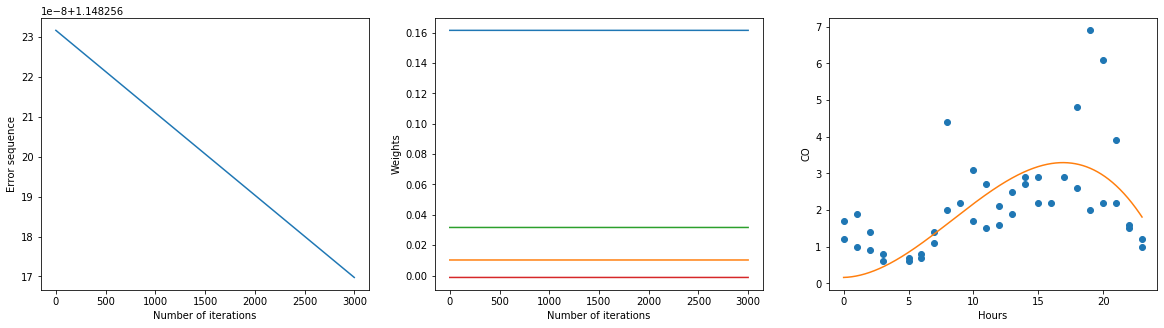

In [43]:
plotGraph(X, T, W, error_sequence, W_sequence, cubic_model)
print(W)
print(error_sequence[-1])

In contrast to the first two models, where the highest learning rates produced the best resluts, the cubic model performs best when the learning rate is lower. When the learning rate is changed from 1.e-2 to 1.e-4, the error rate changes by quite a bit but after that every decrease in the learning rate only produced a minor decrease in the error rate.

# Quartic Model

Quartic model uses five weights to fit the data. 
The quartic_model function returns the expected values based on intial weights.
The quartic_model_gradient function returns the change in error with respect to the change in weights. I have plotted five graphs each with a different learning rate from 1.e-2 to 1.e-10.

In [44]:
# returns expected values for each X
def quartic_model(X, W):
  return W[0, 0] + X*W[1, 0] + (X**2)*W[2, 0] + (X**3)*W[3, 0] + (X**4)*W[4, 0]

In [45]:
# this function returns the value of how the error changes with respect to the weights
def quartic_model_gradient(X, T, W):
  Y = quartic_model(X, W)
  dydw = np.ones((X.shape[0], 1))
  dydw = np.hstack((dydw, X, X**2, X**3, X**4))
  dedy = -2 * (T - Y)
  dedw = dedy.T @ dydw / X.shape[0]
  return dedw.T

In [46]:
W = np.array(np.linspace(0.2, 1.0, 5)).reshape(5, 1)
W, error_sequence, W_sequence = W, error_sequence, W_sequence = gradient_descent_adam(quartic_model, quartic_model_gradient, rmse, X, T, W, 1.e-2, 3000)

[[-0.46363228]
 [-0.40184314]
 [-0.28898065]
 [-0.14876833]
 [ 0.00782076]]
113.52434433861286


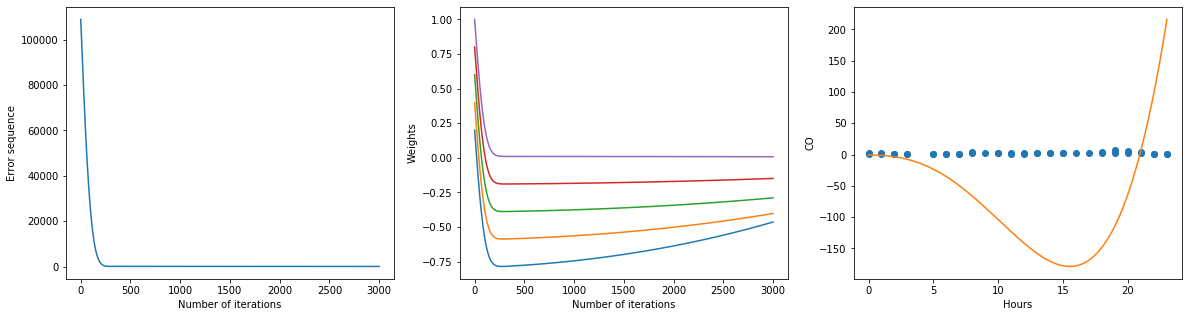

In [47]:
plotGraph(X, T, W, error_sequence, W_sequence, quartic_model)
print(W)
print(error_sequence[-1])

In [48]:
W = np.array(np.linspace(0.2, 1.0, 5)).reshape(5, 1)
W, error_sequence, W_sequence = W, error_sequence, W_sequence = gradient_descent_adam(quartic_model, quartic_model_gradient, rmse, X, T, W, 1.e-4, 3000)

[[-0.08290995]
 [ 0.11707977]
 [ 0.31707329]
 [ 0.51706885]
 [ 0.71706562]]
77776.52664675897


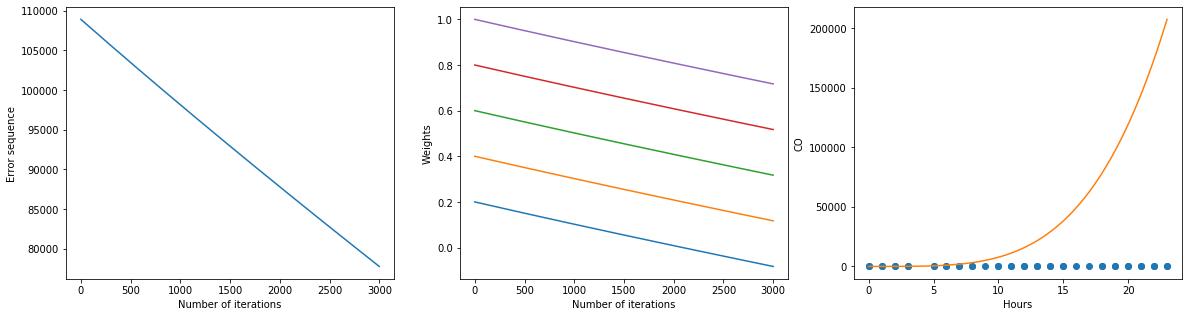

In [49]:
plotGraph(X, T, W, error_sequence, W_sequence, quartic_model)
print(W)
print(error_sequence[-1])

In [50]:
W = np.array(np.linspace(0.2, 1.0, 5)).reshape(5, 1)
W, error_sequence, W_sequence = W, error_sequence, W_sequence = gradient_descent_adam(quartic_model, quartic_model_gradient, rmse, X, T, W, 1.e-6, 3000)

[[0.19700155]
 [0.39700155]
 [0.59700155]
 [0.79700155]
 [0.99700155]]
108557.14143262708


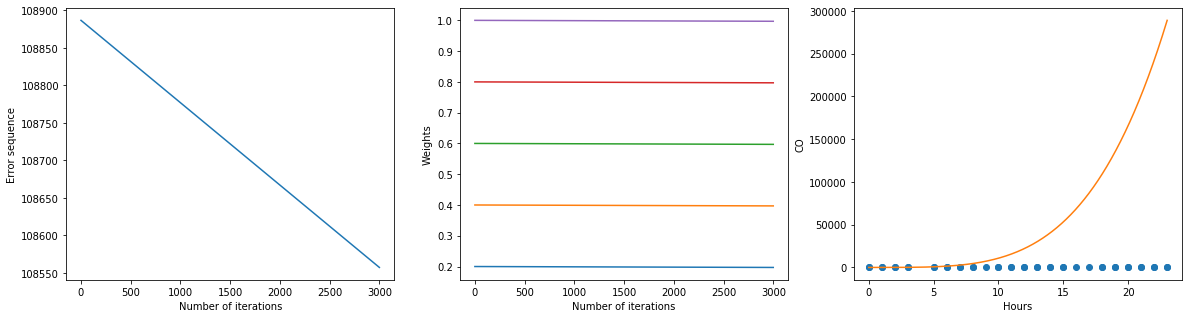

In [51]:
plotGraph(X, T, W, error_sequence, W_sequence, quartic_model)
print(W)
print(error_sequence[-1])

In [52]:
W = np.array(np.linspace(0.2, 1.0, 5)).reshape(5, 1)
W, error_sequence, W_sequence = W, error_sequence, W_sequence = gradient_descent_adam(quartic_model, quartic_model_gradient, rmse, X, T, W, 1.e-8, 3000)

[[0.19997]
 [0.39997]
 [0.59997]
 [0.79997]
 [0.99997]]
108883.53563900356


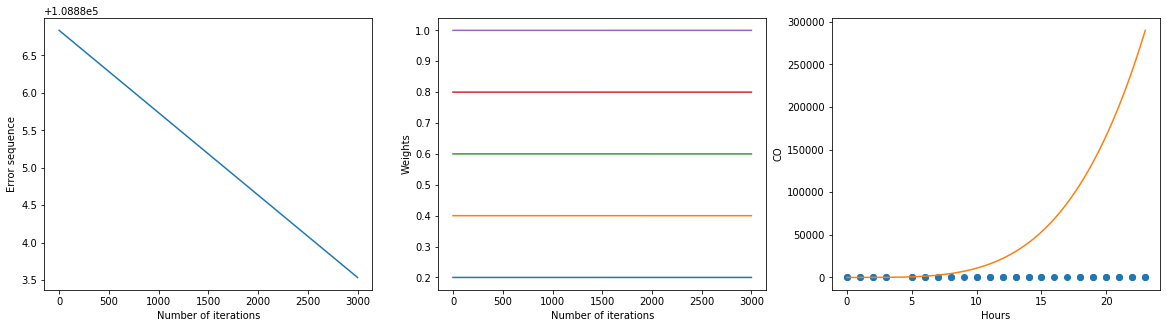

In [53]:
plotGraph(X, T, W, error_sequence, W_sequence, quartic_model)
print(W)
print(error_sequence[-1])

In [54]:
W = np.array(np.linspace(0.2, 1.0, 5)).reshape(5, 1)
W, error_sequence, W_sequence = W, error_sequence, W_sequence = gradient_descent_adam(quartic_model, quartic_model_gradient, rmse, X, T, W, 1.e-10, 3000)

[[0.1999997]
 [0.3999997]
 [0.5999997]
 [0.7999997]
 [0.9999997]]
108886.80126508856


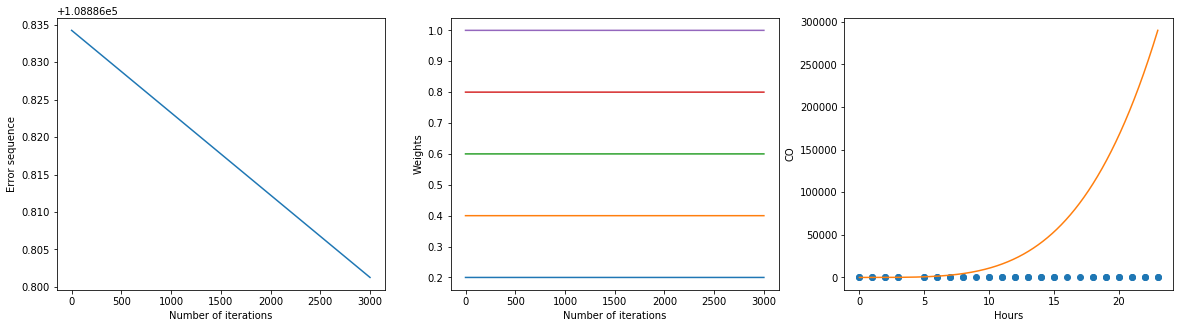

In [55]:
plotGraph(X, T, W, error_sequence, W_sequence, quartic_model)
print(W)
print(error_sequence[-1])

None of the rates applied to the quartic model give any good results.

# Extra Credit

I had to fit the data to a model which was a combination of the linear and sine function.



## Linear Sine Model One

$ Y = w0 + w1X + w2sin(X) $




In [56]:
# returns expected values for each X
def linear_sine_model(X, W):
  return W[0, 0] + X * W[1, 0] + np.sin(X) * W[2, 0]

$ dy/dw0 = 1 $

$ dy/dw1 = X $

$ dy/dw2 = sin(X) $



$ de/dw = de/dy * dy/dw $



In [57]:
# this function returns the value of how the error changes with respect to the weights
def linear_sine_model_gradient(X, T, W):
  Y = linear_sine_model(X, W)
  dydw = np.ones((X.shape[0], 1))
  dydw = np.hstack((dydw, X, np.sin(X)))
  dedy = -2 * (T - Y)
  dedw = dedy.T @ dydw / X.shape[0]
  return dedw.T                        
                                                      

In [58]:
W = np.array((0.2, 0.4, 0.6)).reshape(3, 1)
W, error_sequence, W_sequence = gradient_descent_adam(linear_sine_model, linear_sine_model_gradient, rmse, X, T, W, 1.e-2, 3000)

[[0.99324172]
 [0.09454775]
 [0.49360465]]
1.162513678730445


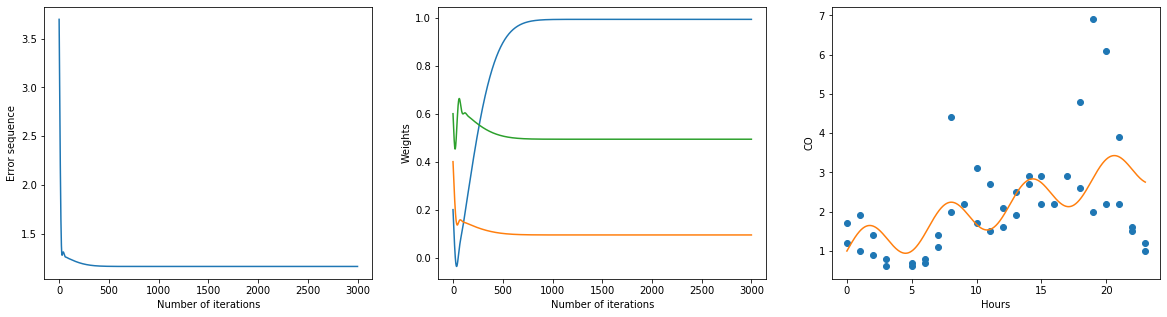

In [59]:
plotGraph(X, T, W, error_sequence, W_sequence, linear_sine_model)
print(W)
print(error_sequence[-1])

In [60]:
W = np.array((0.2, 0.4, 0.6)).reshape(3, 1)
W, error_sequence, W_sequence = gradient_descent_adam(linear_sine_model, linear_sine_model_gradient, rmse, X, T, W, 1.e-4, 3000)

[[0.01068388]
 [0.19092086]
 [0.54520385]]
1.3523990392744754


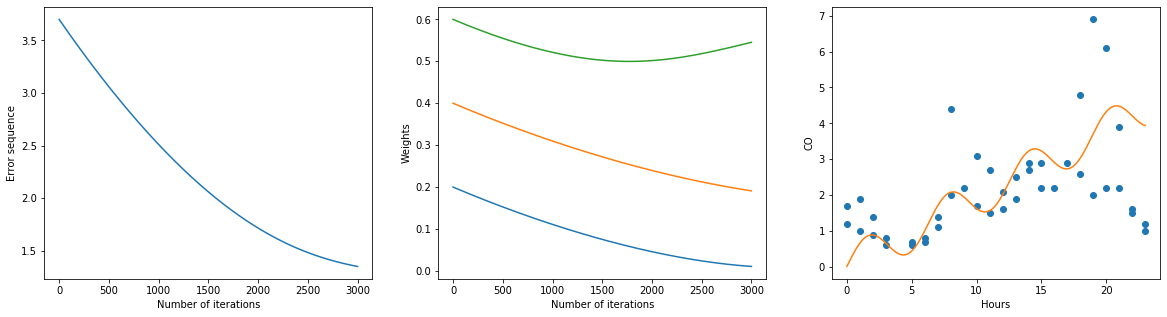

In [61]:
plotGraph(X, T, W, error_sequence, W_sequence, linear_sine_model)
print(W)
print(error_sequence[-1])

In [62]:
W = np.array((0.2, 0.4, 0.6)).reshape(3, 1)
W, error_sequence, W_sequence = gradient_descent_adam(linear_sine_model, linear_sine_model_gradient, rmse, X, T, W, 1.e-6, 3000)

[[0.19700706]
 [0.3970064 ]
 [0.59701224]]
3.6585834933427117


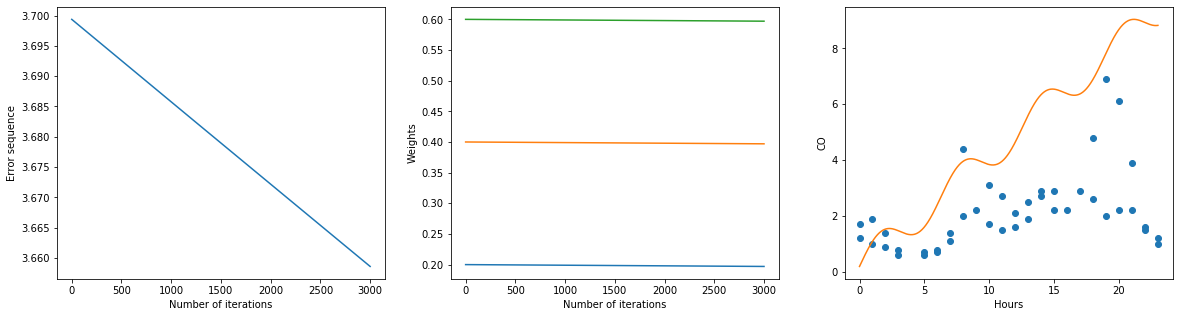

In [63]:
plotGraph(X, T, W, error_sequence, W_sequence, linear_sine_model)
print(W)
print(error_sequence[-1])

In [64]:
W = np.array((0.2, 0.4, 0.6)).reshape(3, 1)
W, error_sequence, W_sequence = gradient_descent_adam(linear_sine_model, linear_sine_model_gradient, rmse, X, T, W, 1.e-8, 3000)

[[0.19997]
 [0.39997]
 [0.59997]]
3.6989829429246295


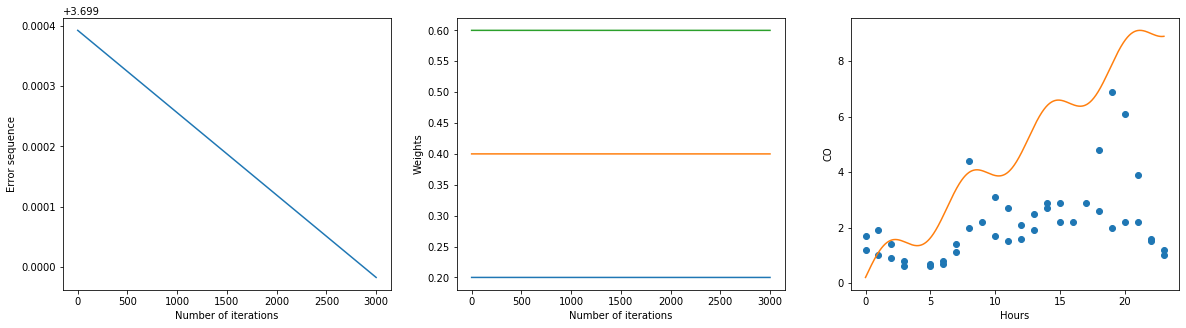

In [65]:
plotGraph(X, T, W, error_sequence, W_sequence, linear_sine_model)
print(W)
print(error_sequence[-1])

In [66]:
W = np.array((0.2, 0.4, 0.6)).reshape(3, 1)
W, error_sequence, W_sequence = gradient_descent_adam(linear_sine_model, linear_sine_model_gradient, rmse, X, T, W, 1.e-10, 3000)

[[0.1999997]
 [0.3999997]
 [0.5999997]]
3.6993881205399086


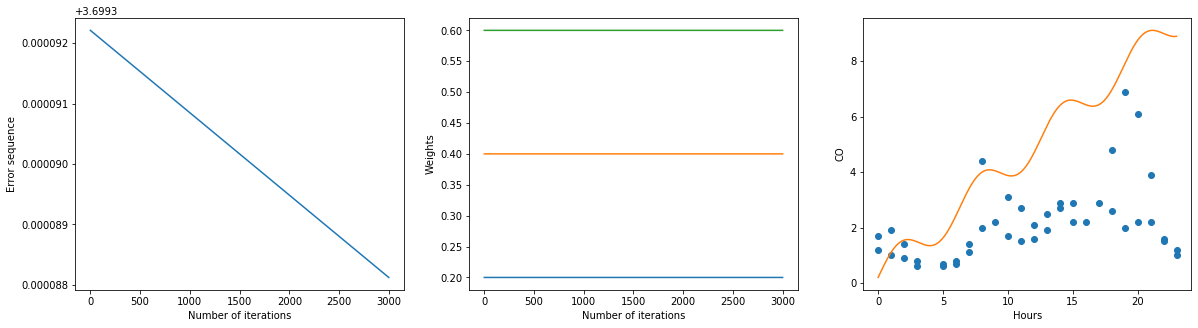

In [67]:
plotGraph(X, T, W, error_sequence, W_sequence, linear_sine_model)
print(W)
print(error_sequence[-1])

## Linear Sine Model Two

$ Y = w0 + w1X + w2sin(Xw3 + w4) $


In [68]:
# returns expected values for each X
def linear_sine_model_two(X, W):
  return W[0, 0] + W[1, 0] * X + W[2, 0] * np.sin((W[3, 0] * X) + W[4, 0])

$ dy/dw0 = 1 $

$ dy/dw1 = X $

$ dy/dw2 = sin(X) $

$ dy/dw3 = w2cos(Xw3 + w4) $

$ dy/dw4 = w2cos(Xw3 + w4) $


$ de/dw = de/dy * dy/dw $

In [69]:
# this function returns the value of how the error changes with respect to the weights
def linear_sine_model_two_gradient(X, T, W):
  Y = linear_sine_model_two(X, W)
  term1 = np.ones((X.shape[0], 1))
  term2 = X
  term3 = np.sin(W[3, 0] * X + W[4, 0] )
  term4 = W[2, 0] * np.cos(W[3, 0] * X + W[4, 0]) * X
  term5 = W[2, 0] * np.cos(W[3, 0] * X + W[4, 0])
  dydw = np.hstack((term1, term2, term3, term4, term5))
  dedy = -2 * (T - Y)
  dedw = dedy.T @ dydw / X.shape[0]
  return dedw.T   

In [70]:
W = np.array((0.1, 0.2, 0.3, 0.4, 0.5)).reshape(5, 1)
W, error_sequence, W_sequence = gradient_descent_adam(linear_sine_model_two, linear_sine_model_two_gradient, rmse, X, T, W, 1.e-2, 3000)

[[ 5.70340275]
 [-0.34052065]
 [ 4.13678765]
 [ 0.14975153]
 [ 4.71654068]]
1.0696286130521098


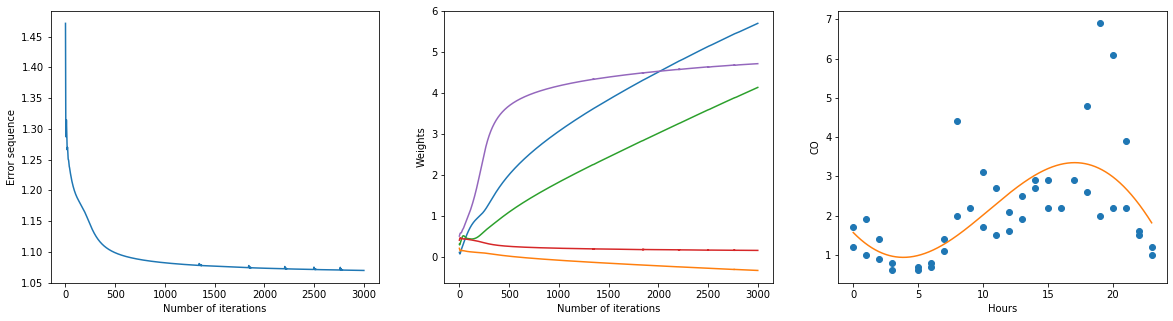

In [71]:
plotGraph(X, T, W, error_sequence, W_sequence, linear_sine_model_two)
print(W)
print(error_sequence[-1])

In [72]:
W = np.array((0.1, 0.2, 0.3, 0.4, 0.5)).reshape(5, 1)
W, error_sequence, W_sequence = gradient_descent_adam(linear_sine_model_two, linear_sine_model_two_gradient, rmse, X, T, W, 1.e-4, 3000)

[[0.34652568]
 [0.13878145]
 [0.47072923]
 [0.43205746]
 [0.69565931]]
1.2312879044997087


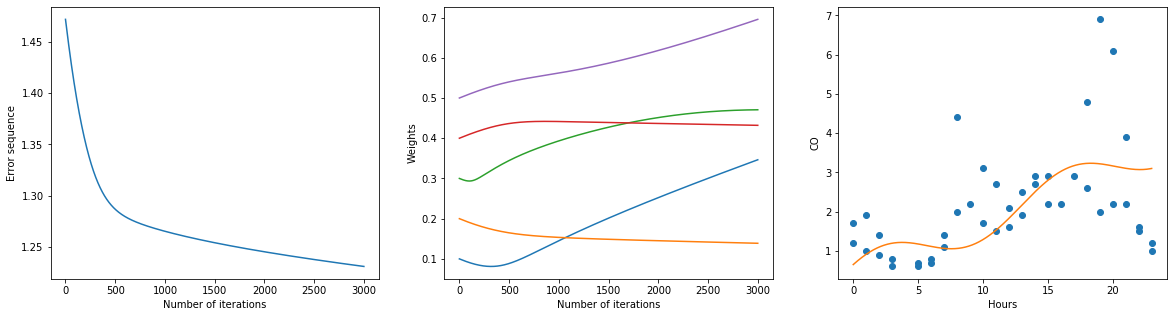

In [73]:
plotGraph(X, T, W, error_sequence, W_sequence, linear_sine_model_two)
print(W)
print(error_sequence[-1])

In [74]:
W = np.array((0.1, 0.2, 0.3, 0.4, 0.5)).reshape(5, 1)
W, error_sequence, W_sequence = gradient_descent_adam(linear_sine_model_two, linear_sine_model_two_gradient, rmse, X, T, W, 1.e-6, 3000)

[[0.09706428]
 [0.19703572]
 [0.29722638]
 [0.40297692]
 [0.50298046]]
1.4486639376204056


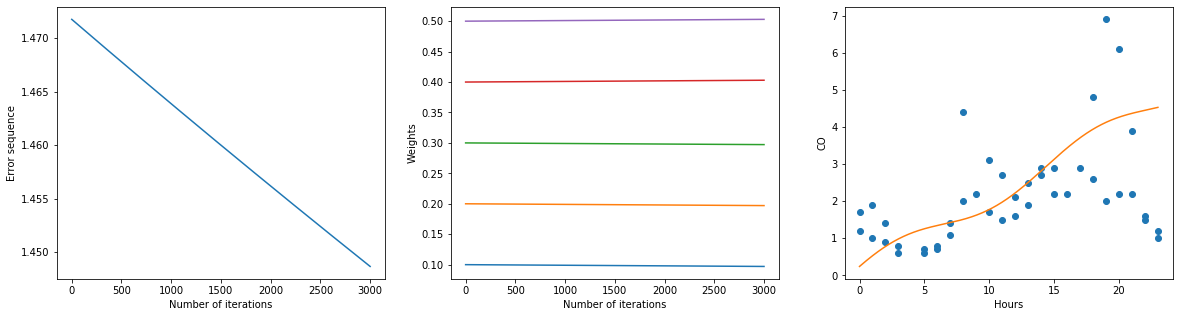

In [75]:
plotGraph(X, T, W, error_sequence, W_sequence, linear_sine_model_two)
print(W)
print(error_sequence[-1])

In [76]:
W = np.array((0.1, 0.2, 0.3, 0.4, 0.5)).reshape(5, 1)
W, error_sequence, W_sequence = gradient_descent_adam(linear_sine_model_two, linear_sine_model_two_gradient, rmse, X, T, W, 1.e-8, 3000)

[[0.09997001]
 [0.19997   ]
 [0.29997002]
 [0.40003   ]
 [0.50003   ]]
1.4715238139606985


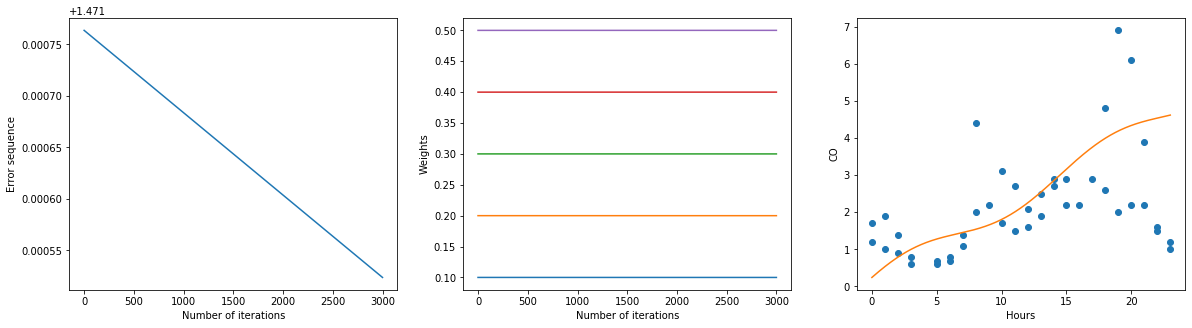

In [77]:
plotGraph(X, T, W, error_sequence, W_sequence, linear_sine_model_two)
print(W)
print(error_sequence[-1])

In [78]:
W = np.array((0.1, 0.2, 0.3, 0.4, 0.5)).reshape(5, 1)
W, error_sequence, W_sequence = gradient_descent_adam(linear_sine_model_two, linear_sine_model_two_gradient, rmse, X, T, W, 1.e-10, 3000)

[[0.0999997]
 [0.1999997]
 [0.2999997]
 [0.4000003]
 [0.5000003]]
1.4717612469791992


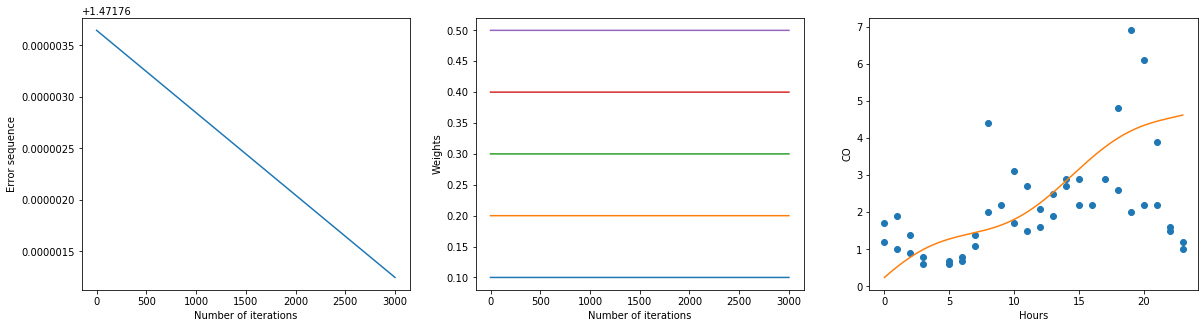

In [79]:
plotGraph(X, T, W, error_sequence, W_sequence, linear_sine_model_two)
print(W)
print(error_sequence[-1])

In [81]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Kuvar-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2]).reshape(-1, 1)
  Y = linear_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3]).reshape(-1, 1)
  Y = quadratic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3, 1.5).reshape(-1, 1)
  Y = cubic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3, 1.5, 0.3]).reshape(-1, 1)
  Y = quartic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3,